# Tutorial 1: Using ``TimeseriesExtractor``

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/donishadsmith/neurocaps/blob/stable/docs/examples/tutorial-1.ipynb)

This module is designed to perform timeseries extraction, nuisance regression, and visualization. Additionally, it
generates the necessary dictionary structure required for ``CAP``. If the BOLD images have not been preprocessed using
fMRIPrep (or a similar pipeline), the dictionary structure can be manually created.

The output in the `Extracting Timeseries` section is generated from a test run using GitHub Actions. This test uses
a truncated version of the open dataset provided by [Laumann & Poldrack](https://doi.org/10.1016/j.neuron.2015.06.037)
and was obtained from the OpenfMRI database, accession number [ds000031]((https://openfmri.org/dataset/ds000031/)).

In [1]:
# Download packages
try:
    import neurocaps
except:
    !pip install neurocaps[windows,demo]

## Download Data

Download test dataset used for Github Actions from Github.

In [2]:
import os, subprocess, sys

demo_dir = "neurocaps_demo"
os.makedirs(demo_dir, exist_ok=True)

try:
    if sys.platform != "win32":
        cmd = (
            "cd neurocaps_demo && "
            "git clone --depth 1 --filter=blob:none --sparse https://github.com/donishadsmith/neurocaps.git && "
            "cd neurocaps && "
            "git sparse-checkout set tests/data/dset &&"
            "git submodule update --init --depth 1 -- tests/data"
        )
        os.system(cmd)
    else:
        repo_dir = os.path.join(demo_dir, "neurocaps")

        # Enable git longpath
        subprocess.run(
            ["git", "config", "--global", "core.longpaths", "true"],
            check=True,
        )

        subprocess.run(
            [
                "git",
                "clone",
                "--depth",
                "1",
                "--filter=blob:none",
                "--sparse",
                "https://github.com/donishadsmith/neurocaps.git",
            ],
            check=True,
            cwd=demo_dir,
        )

        subprocess.run(
            ["git", "submodule", "update", "--init", "--depth", "1", "--", "tests/data"],
            check=True,
            cwd=repo_dir,
        )

    # Rename folder
    os.makedirs("neurocaps_demo/data", exist_ok=True)
    os.rename("neurocaps_demo/neurocaps/tests/data/dset", "neurocaps_demo/data/dset")
except:
    pass

## Extracting Timeseries

*Note*: Adding an asterisk to the end of a confound name collects all confounds starting with the
word preceeding the asterisk.

In [3]:
from neurocaps.extraction import TimeseriesExtractor

confounds = ["cosine*", "a_comp_cor*", "rot*"]

parcel_approach = {"Schaefer": {"n_rois": 100, "yeo_networks": 7, "resolution_mm": 2}}

extractor = TimeseriesExtractor(
    space="MNI152NLin2009cAsym",
    parcel_approach=parcel_approach,
    standardize=True,
    use_confounds=True,
    low_pass=0.15,
    high_pass=None,
    confound_names=confounds,
    fd_threshold=0.35,
)

2025-07-21 14:28:53,532 neurocaps.extraction._internals.confounds [INFO] Confound regressors to be used if available: cosine*, a_comp_cor*, rot*.


In [4]:
extractor.get_bold(
    bids_dir="neurocaps_demo/data/dset",
    session="002",
    task="rest",
    pipeline_name="fmriprep_1.0.0/fmriprep",
    tr=1.2,
    progress_bar=False,
)

2025-07-21 14:28:54,978 neurocaps.extraction.timeseries_extractor [INFO] BIDS Layout: ...mples\neurocaps_demo\data\dset | Subjects: 1 | Sessions: 1 | Runs: 1
2025-07-21 14:28:55,014 neurocaps.extraction._internals.postprocess [INFO] [SUBJECT: 01 | SESSION: 002 | TASK: rest | RUN: 001] Preparing for Timeseries Extraction using [FILE: sub-01_ses-002_task-rest_run-001_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz].
2025-07-21 14:28:55,031 neurocaps.extraction._internals.postprocess [INFO] [SUBJECT: 01 | SESSION: 002 | TASK: rest | RUN: 001] The following confounds will be used for nuisance regression: cosine_00, cosine_01, cosine_02, cosine_03, cosine_04, cosine_05, cosine_06, a_comp_cor_00, a_comp_cor_01, a_comp_cor_02, a_comp_cor_03, a_comp_cor_04, a_comp_cor_05, rot_x, rot_y, rot_z.


``print`` can be used to return a string representation of the ``TimeseriesExtractor`` class.

In [5]:
print(extractor)

Current Object State:
Preprocessed BOLD Template Space                           : MNI152NLin2009cAsym
Parcellation Approach                                      : Schaefer
Signal Cleaning Parameters                                 : {'masker_init': {'detrend': False, 'low_pass': 0.15, 'high_pass': None, 'smoothing_fwhm': None}, 'standardize': True, 'use_confounds': True, 'confound_names': ['cosine*', 'a_comp_cor*', 'rot*'], 'n_acompcor_separate': None, 'dummy_scans': None, 'fd_threshold': 0.35, 'dtype': None}
Task Information                                           : {'task': 'rest', 'session': '002', 'runs': None, 'condition': None, 'condition_tr_shift': 0, 'tr': 1.2, 'slice_time_ref': 0.0}
Number of Subjects                                         : 1
CPU Cores Used for Timeseries Extraction (Multiprocessing) : None
Subject Timeseries Byte Size                               : 15784 bytes


The extracted timeseries is stored as a nested dictionary and can be accessed using the ``subject_timeseries``
property. The ``TimeseriesExtractor`` class has several
[properties](https://neurocaps.readthedocs.io/en/stable/generated/neurocaps.extraction.TimeseriesExtractor.html#properties)
**Some properties can also be used as setters.**

In [6]:
print(extractor.subject_timeseries)

{'01': {'run-001': array([[ 1.2033961 , -1.2330143 , -1.2266738 , ...,  0.79417294,
         0.03897883, -1.2275234 ],
       [-0.41716266,  0.18100384,  0.17953618, ..., -0.7285049 ,
         0.46337456,  0.232506  ],
       [-0.6353623 ,  0.52065367,  0.51416904, ..., -0.6392374 ,
         0.30418062,  0.5296185 ],
       ...,
       [-0.00439697, -0.33513063, -0.344346  , ..., -1.7402033 ,
         0.6538972 , -0.48667648],
       [-0.21270348,  0.5142317 ,  0.5091558 , ...,  0.5407353 ,
        -0.7391407 ,  0.4986693 ],
       [-0.13190913,  0.53207046,  0.53672856, ...,  1.6365708 ,
        -0.83822703,  0.65070736]], shape=(39, 100), dtype=float32)}}


## Reporting Quality Control Metrics

<font size="3">Checking statistics on framewise displacement and dummy volumes using the `self.report_qc` method. Only censored frames with valid data on both sides are interpolated, while censored frames at the edge of the timeseries (including frames that border censored edges) are always scrubbed and counted in "Frames_Scrubbed". In the data, the last frame is the only one with an FD > 0.35. Additionally, [scipy's Cubic Spline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html) is used to only interpolate censored frames.</font>

In [7]:
extractor.report_qc(output_dir=demo_dir, filename="qc.csv", return_df=True)

,Subject_ID,Run,Mean_FD,Std_FD,Frames_Scrubbed,Frames_Interpolated,Mean_High_Motion_Length,Std_High_Motion_Length,N_Dummy_Scans
0,01,run-001,0.105315,0.109977,1,0,1.0,0.0,NaN


## Saving Timeseries

In [8]:
extractor.timeseries_to_pickle(output_dir=demo_dir, filename="rest_Schaefer.pkl")

## Visualizing Timeseries

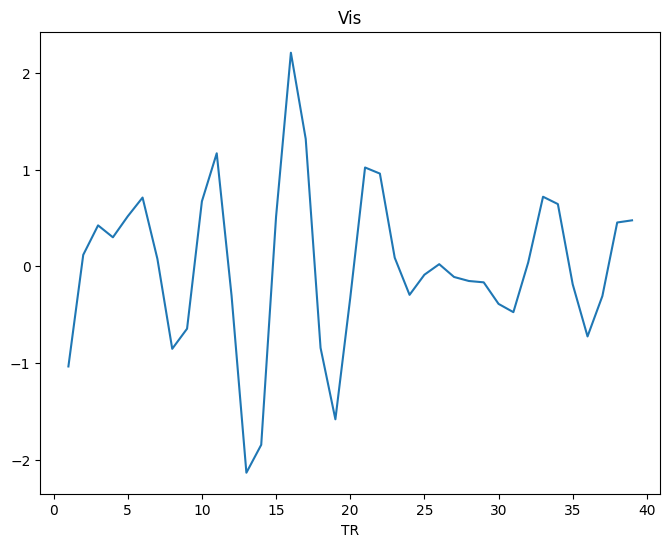

In [9]:
# Visualizing a region
from neurocaps.utils import PlotDefaults

plot_kwargs = PlotDefaults.visualize_bold()
plot_kwargs["figsize"] = (8, 6)

extractor.visualize_bold(subj_id="01", run="001", region="Vis", **plot_kwargs)

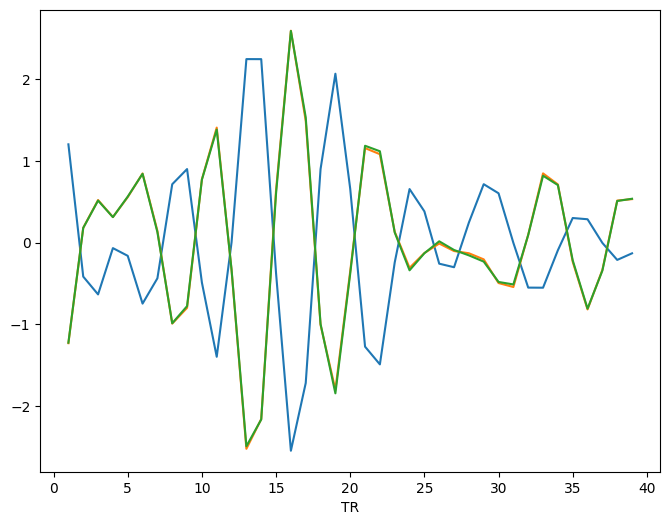

In [10]:
# Visualizing a several nodes
extractor.visualize_bold(subj_id="01", run="001", roi_indx=[0, 1, 2], **plot_kwargs)